## This notebook is designed to pratice with both geopandas and census data.  This is a simple spatial exploratory analysis of census data. The goal is to assess wheather the location of the [linkNYC](https://www.link.nyc/) access points is optimal to guarantee a more "democratic" access to the internet.

## THE CENSUS: 
make sure you do the assigned reading about the census. Census data are a national trasure! The census is a survey  designed to collect data on every person that lives in the USA every 10 years. The Census Bureau collects data, designes aggregation areas (the census blocks and tracts for example, which are designed for maximal homogeneity across all features). However, the Census Bureau does not only collect and aggregate data every 10 years, it also collects the America Community Survey every 5 years, and some more restricted survey on an annual bases. The 1 year survey data is what we will use: https://www.census.gov/services/index.html


# 1. PUMA : Public Use Microdata Area
Census geographies that are not specific political entities (i.e. states, counties etc) are designed for homogeneity so that aggregating the data over the whole area will leat to an estimat (mean or median for example) with minimal variance. Among these geographies are the _census tracts_, _census blocks_, and _Public Use Microdata Areas (PUMAs)_. PUMAs are geographical areas designed to aggregate census data. Each PUMA contains at least 100,000 people. PUMAs do not overlap, and are contained within a single state. 

## 1.1 download the NYC  Public Use Microdata Areas (PUMA) geometry fron the NYC Open Data API and read it in with geopandas

https://data.cityofnewyork.us/Housing-Development/Public-Use-Microdata-Areas-PUMA-/cwiz-gcty/data

download it as a shape file. When you download a shapefile you actually download a zipped folder which contains the shape file and other files that are necessary to read the shape file in. You can do that with the urllib library in python 3 with the function 

        urllib.request.urlretrieve(url, "file.gz")

then unpack the data into your PUIdata directory, then read it in with geopandas, reading in the shape file with the function 

        geopandas.GeoDataFrame.from_file(filename)

In [195]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%pylab inline
import zipfile
import urllib
import requests
import json
import io
import os
import sys
import shapely
import datetime
from fiona.crs import from_epsg
import pysal as ps

Populating the interactive namespace from numpy and matplotlib


In [196]:
os.getenv("PUIDATA")

'/nfshome/jz3309/PUIdata'

In [197]:
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile", 
                           "Public Use Microdata Areas (PUMA).zip")

('Public Use Microdata Areas (PUMA).zip',
 <http.client.HTTPMessage at 0x7fa5628463c8>)

In [198]:
os.system('mv Public Use Microdata Areas (PUMA).zip $PUIDATA')


512

In [199]:
!unzip "Public Use Microdata Areas (PUMA).zip"

Archive:  Public Use Microdata Areas (PUMA).zip
  inflating: geo_export_d1012f48-b225-4895-8e54-8886c0a390b3.dbf  
  inflating: geo_export_d1012f48-b225-4895-8e54-8886c0a390b3.shp  
  inflating: geo_export_d1012f48-b225-4895-8e54-8886c0a390b3.shx  
  inflating: geo_export_d1012f48-b225-4895-8e54-8886c0a390b3.prj  


In [200]:
pumashp = gpd.GeoDataFrame.from_file("geo_export_2f327c50-2f98-4e99-b968-463649285182.shp")
pumashp.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


PUMAs were first created for the 1990 Census. PUMAs are identified by a specific 4 numbers id. In the shapefile foung at data.cityofnewyork.us the id is named "puma" and it is in fact a 4 digits number. You can read it in as an integer (although of course it is a categorical variable inherently!). Often the PUMA id is found in conjunction with the 3 numbers state id, leading to a 7 numbers identification. The id for the State of NY is 036. See this link for more: https://www.census.gov/geo/reference/geoidentifiers.html


In [201]:
pumashp.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [202]:
pumashp.crs

{'init': 'epsg:4326'}

## 1.2  plot the PUMA NYC regions

you can use the geopandas function plot. 
What is the appropriate plot to just show the shape of the PUMA regions? A choropleth could be ok, but it is better to just draw the contours of the region, since we do not want to highlight some regions over others by color choices. 

(Note: a while ago I wrote a quick function that plots choropleths and maps of NYC specifically putting legends and colorbars in the empty spaces taking advantage of the shape of the city and you are welcome to use it: https://github.com/fedhere/choroplethNYC. BUT YOU DO NOT HAVE TO)

If you want to learn how to install a package from within the notebook look here https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

Your map should look someting like:

Text(0.5,1,'New York City Census Borough PUMAs')

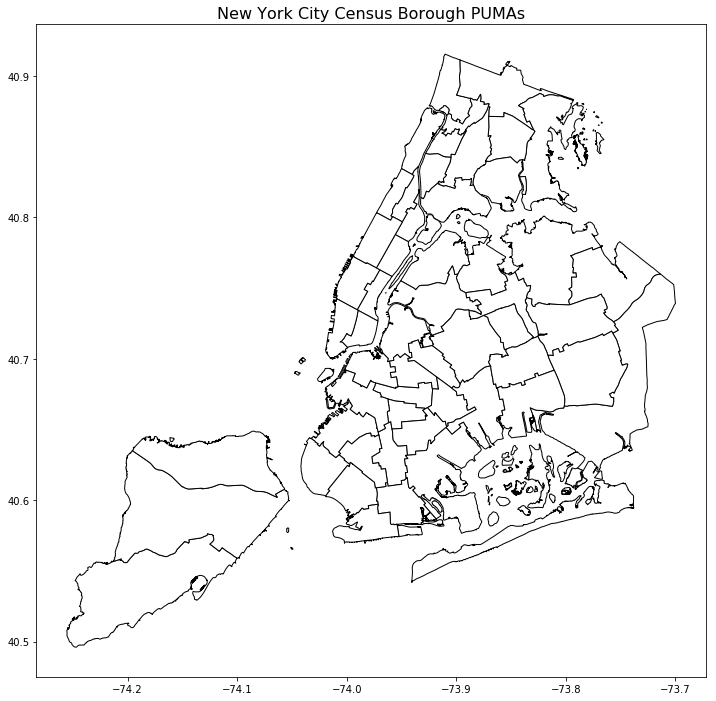

In [203]:
fig, ax = plt.subplots(figsize=(12,12))
pumashp.plot(color='white', edgecolor='black', ax=ax)
ax.set_title('New York City Census Borough PUMAs', fontsize=16)

### Figure1: The shape of PUMA regions of NYC

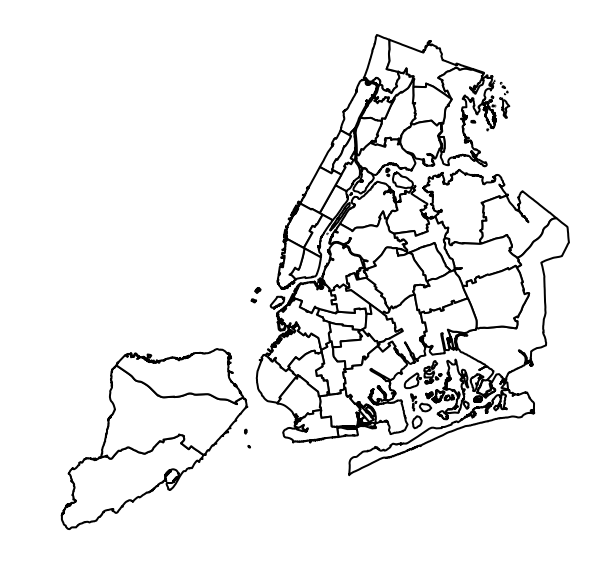

In [205]:
# using the built in plot function as pumashp.plot(pumashp....)
# using a choroplethNYC function that FBB wrote
import choroplethNYC 
choroplethNYC.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

## Figure1: The shape of PUMA regions of NYC

# 2. American Fact Finder data on percentage of houses with broadband internet access

Download the table of data from 2016 for NYC: you want to obtain data on broadband access (percentage of households with broadband access) at the PUMA (Public Use Microdata Area) geographical area level. 

This may be tricky. But familiarizing with Census and American Commjunity Survey data is super important for urban science. Here you should use the API, but you should also practice interacting with the website: 

You  should read the datta in thgouth the API but also download the data manually and compare the two datasets.

## 2.1 Get data with American Fact Finder (AFF) API: 
you can request an API key, although I think it is not necessary for this search (but it is good to practice). Obtain a key and save it into a python file. DO NOT UPLOAD THE FILE CONTAINING THE API KEY TO GITHUB. Keep your API keys private. 

If you need help with the API you can ask questions in this [Gitter channel](https://gitter.im/uscensusbureau/general) (I did myself to design this homework!) 
The internet subscription by household is data surveyd annually. You can find out what are the features that you can query through the API for the annually surveyed data at this url: https://api.census.gov/data/2016/acs/acs1/variables.json

read it in as a jason file - you can do it with pandas (but it is slow). You can do it as I do below with the request package

In [206]:
#reading in my api key saved in censusAPI.py as
#myAPI = 'XXXXXXXXXXXXXXX'
from censusAPI import myAPI

In [207]:
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = resp.json()

In [208]:
affkeys = np.array(list(aff1y['variables'].keys()))

In [209]:
affkeys

array(['B03002_011E', 'B25113_007E', 'C27002_018E', ..., 'B24010A_060E',
       'B24041_012E', 'B06007PR_012E'], 
      dtype='<U14')

In [210]:

[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type')]

In [211]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))
#Python2
#affkeys = np.array(aff1y['variables'].keys())

You need two features: **total number of households**, and **number of households with broadband access**

Broadband access is one of the B28002 keys. However there are many of those! Each variable has several observations associated to it: B28002 is all internet access data (broadband, dial up, none, ...), and for each of those you have the estimate (count, mean, median, percentage...), the margin of errors, and annotations. Those are identified by an appendix that begins with "\_". Look carefully at the line of code below and its output. I am creating a list that contains the keys of the dictionary I created from the json file for all B28002 observations  (rows that start with "B28002") that include the word "Broadband" in the description.

The syntax is a lost comprehension:

        as = \[a for a in listOfAs\] 

is simply a compact way to write

        as = \[\]
        for a in listOfAs:
            as.append(a)
            
with an if statement tha selects broadband         

In [212]:
[(k, aff1y['variables'][k]['label']) for k in affkeys if k.startswith("B28002") and
'Broadband' in aff1y['variables'][k]['label']]

[('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type')]

In [213]:
# total number of households
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [214]:
#number of broadband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

Now that you have the variable names use them to extract the relevant data with the ACS API.

The API url is as follows:

root: https://api.census.gov/data/2016/acs/acs1

action: get=[variable Name],NAME

geometry: for=[geometry]:[desired geometry values]in=[larger geometry]:[desired larger geometry values]

API key: key:[api key]

the URL is constructed as root?action&geometry&key

Note that it took me a long time to figure out how to request the right geometry: in the url I write below the geometry is "public%20use%20microdata%20area" where %20 is the character for ' ' (space) in a url, and ":*" means all PUMAS

state:36 is New York State

In [215]:
#without myapi

In [216]:
# getting the broadband access number of households
keyNBB = 'B28002_004E'
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36"
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [217]:
#use api to get the data from acs  !!ERROR

In [218]:
keyNBB = 'B28002_004E'
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI

In [219]:
#resp = requests.request('GET',url).content

#pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

#pumaBB.head()

#Error tokenizing data. C error: Expected 1 fields in line 9, saw 3


In [220]:
#api get: the total number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36"
resp = requests.request('GET',url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
pumaPP.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


## 2.2 generate a feature for the percentage of households with broadband access

In [224]:
#001E: total number households
#004E: broadband

#merge two data
pumaBB = pumaBB.merge(pumaPP, on='public use microdata area')

pumaBB=pumaBB.iloc[:,:6]
pumaBB.head(2)

,B28002_004E,NAME_x,state_x,public use microdata area,Unnamed: 4_x,B28002_001E
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN,40479
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,67092


In [226]:
pumaBB['pcBB'] = pumaBB['B28002_004E']/pumaBB['B28002_001E']*100
pumaBB.head()

,B28002_004E,NAME_x,state_x,public use microdata area,Unnamed: 4_x,B28002_001E,pcBB
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN,40479,80.552879
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,67092,75.733321
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN,51614,79.842678
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,44300,81.433409
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,61146,78.150656


## 2.3 Now compare it with the AFF published "percentage of households with broadband access" which is a feature available through their website but that cannot be downloaded directly from the API. It compiled by AFF the same way we did above

In [227]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv.1",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])
bbpc.drop(0,inplace=True)
bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
1,36,81.7,0.2
2,3600100,80.6,2.6
3,3600200,75.7,2.2
4,3600300,79.8,2.6
5,3600401,81.4,2.4


In [228]:
bbpc.dtypes

GCT_STUB.target-geo-id2    object
HC01                       object
HC02                       object
dtype: object

In [229]:
bbpc['GCT_STUB.target-geo-id2'] = bbpc['GCT_STUB.target-geo-id2'].astype(int)

bbpc['gid'] = bbpc['GCT_STUB.target-geo-id2']-3600000

bbpc['HC01'] = bbpc['HC01'].astype(float)
bbpc['HC02'] = bbpc['HC02'].astype(float)

bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02,gid
1,36,81.7,0.2,-3599964
2,3600100,80.6,2.6,100
3,3600200,75.7,2.2,200
4,3600300,79.8,2.6,300
5,3600401,81.4,2.4,401


notice 2 things:

- that the Target Geo Id2: GCT_STUB.target-geo-id2 is a 7 digits number. See my comment above about it. 
- that there is a weird double header. You can deal with it in one of 2 ways: either reread the file in skipping one row and using the second row as header, or remove that row (for example with bbpc.drop(0, inplace=True)) but also then you should check the *type* of your GCT_STUB.target-geo-id2 feature! The fact that pandas had to read in a column with nombers and characters forced it to read it as a string, and you need to convert it (.astype(int)) to merge it easily with the API acquired data.
In the API dataframe the PUMA id was a 4 digit number. If you have them both as integers and you remove the initial three digits (for example by subtracting 360000 from each value wich you can do as bbpc["gid"] = bbpc.gid - 3600000 then you can merge on the puma id

In the API dataframe the PUMA id was a 4 digit number. If you have them both as integers and you remove the initial three digits (for example by subtracting 360000 from each value wich you can do as bbpc["gid"] = bbpc.gid - 3600000 then you can merge on the puma id

## check that the percentage of households with broadband you generated and the one you red in from the table you downloaded manually are the same

In [230]:
diff_ = pumaBB.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "HC01"]]
diff_.head()

,pcBB,HC01
0,80.552879,80.6
1,75.733321,75.7
2,79.842678,79.8
3,81.433409,81.4
4,78.150656,78.2


In [231]:
diff_["diff"] = np.abs(diff_["pcBB"] - diff_["HC01"].astype(float))

diff_.describe()

,pcBB,HC01,diff
count,145.000000,145.000000,145.000000
mean,81.845478,81.843448,0.026217
std,7.063369,7.065358,0.014480
min,54.932945,54.900000,0.000178
25%,77.770257,77.800000,0.012252
50%,82.826141,82.800000,0.027230
75%,87.305077,87.300000,0.039090
max,93.404143,93.400000,0.049872


# 3 Plot a choropleth of NYC broadband access

## 3.1 Merge with the puma geodataframe and plot a choropleth of the percentage of households with broadband access


In [232]:
pumashp.head(1)

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...


In [233]:
pumashp["puma"] = pumashp["puma"].astype(int)
pumashp = pumashp.merge(pumaBB,how='left' ,left_on = 'puma', right_on = 'public use microdata area')
pumashp.head(1)

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME_x,state_x,public use microdata area,Unnamed: 4_x,B28002_001E,pcBB
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,42158,84.27582


In [234]:
import choroplethNYC as cp

(<matplotlib.figure.Figure at 0x7fa55700a438>,
 <matplotlib.colorbar.Colorbar at 0x7fa5618fb438>)

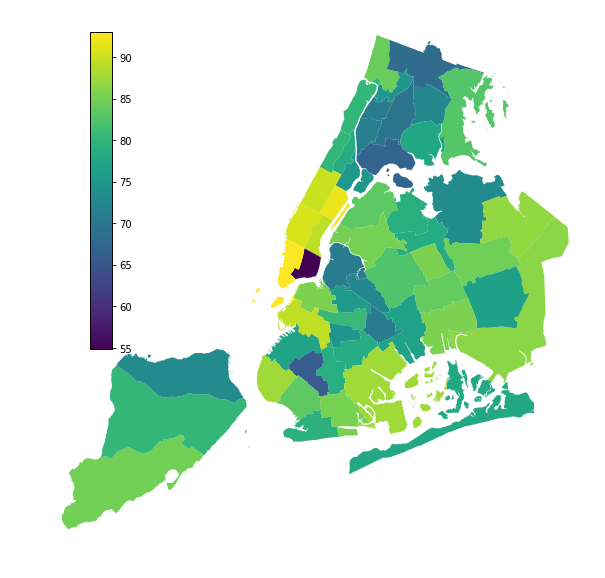

In [236]:
cp.choroplethNYC(pumashp,column='pcBB')

### Figure2: The plot above is the percentage of households with broadband access.Manhattan has higer access than other areas.

## 4. LinkNYC: assess whether the locations of the linkNYC stations are supplying internet where it is needed.

acquire the linkNYC locations and prepare them into a dataframe read it in from the HW9_fb55 folder in : https://github.com/fedhere/PUI2017_fb55

Notice that you can also get a linkNYC locations shapefile from NYC open data, as I did to generate this, but I want you do to do some extra coordinates gymnastics for practice so use the one I provide.

In [ ]:
pd.DataFrame.drop?

In [237]:
linkNYC=pd.read_csv('https://raw.githubusercontent.com/jz3309/PUI2018_jz3309/master/HW7_jz3309/linkNYClocations.csv')

linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [238]:
linkNYC=pd.read_csv('https://raw.githubusercontent.com/jz3309/PUI2018_jz3309/master/HW7_jz3309/linkNYClocations.csv')
linkNYC.drop('Unnamed: 0',axis=1,inplace=True)
linkNYC.head()

,link_site,longitude,date_link_,latitude
0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [239]:
linkNYC.shape

(1414, 4)

## combine long lat into a column like you did in the lab to greate a "geometry" column for the dataframe, then convert the dataframe into a GeoDataFrame linkNYC and set native coordinates frame to lat/lon as you did in the lab

In [240]:
from fiona.crs import from_epsg
linkNYC.crs = from_epsg(4326)
pumashp.crs = from_epsg(4326)

In [241]:
linkNYC['lonlat'] = list(zip(linkNYC['longitude'], linkNYC['latitude'])) #zip  : combine lon lat
linkNYC['geometry'] = linkNYC[['lonlat']].applymap(lambda x:shapely.geometry.Point(x)) # create geometry, 
linkNYC.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938)
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439)
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


## plot the location of the linkNYC stations on top of a choropleth of broadband access percentage in 5 equal intervals

I have also color coded the station by how long ago they have been installed, using the date datetime variable

In [270]:
linkNYC = gpd.GeoDataFrame(linkNYC,geometry='geometry')
linkNYC.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry,days
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753),477
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938),477
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439),477
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042),541
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133),569


In [271]:
# datetime
linkNYC['days']=pd.to_datetime(linkNYC.date_link_)
linkNYC['days']=(datetime.datetime.now().date()-linkNYC.days).apply(lambda x:x.days)
linkNYC.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry,days
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753),477
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938),477
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439),477
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042),541
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133),569


In [272]:
linkNYC.columns

Index(['link_site', 'longitude', 'date_link_', 'latitude', 'lonlat',
       'geometry', 'days'],
      dtype='object')

In [278]:
linkNYC.dtypes

link_site      object
longitude     float64
date_link_     object
latitude      float64
lonlat         object
geometry       object
days            int64
dtype: object

Text(0.5,1,'New York City Census Borough PUMAs by Household Broadband Access and Location of LinkNYC')

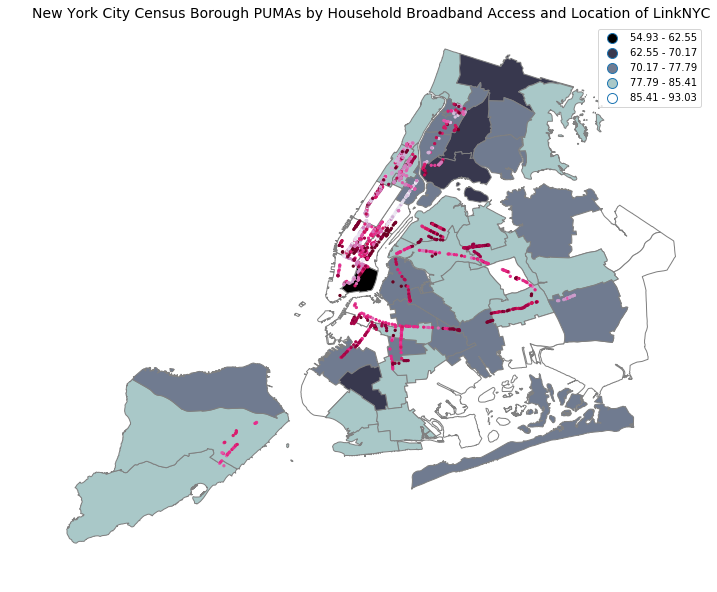

In [362]:
fig,ax=plt.subplots(figsize=(12,10))
pumashp.plot(column='pcBB',ax=ax,cmap='bone',edgecolor='grey', legend=True, scheme='equal_interval',k=5)
linkNYC.plot(column='days',ax=ax,markersize=5,cmap='PuRd_r')
ax.axis('off')
ax.set_title('New York City Census Borough PUMAs by Household Broadband Access and Location of LinkNYC', fontsize=14)

## Figure3: The plot above is the Household Broadband Access and Location of LinkNYC by puma of New York City.

# 5 Find the number of linkNYC locations per person by PUMA

## 5.1 with the AFF API from ACS get the total population by puma and merge it into your GeoDF

the ACS population by variable is B00001_001E, and of course your geometry is PUMA, public%20use%20microdata%20area:*, as before

In [282]:
keypop = 'B00001_001E'
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keypop +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key="

In [283]:
resp = requests.request('GET',url).content
pumapop = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
pumapop.head()

,B00001_001E,NAME,state,public use microdata area,Unnamed: 4
0,3075,"St. Lawrence County PUMA, New York",36,100,NaN
1,4356,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,2736,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,2722,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,2874,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


## 5.2 find the number of station per 100 people per PUMA

Important you can do this with an sjoin(). But sjoin() should not be used with lat/lon coordinates cause they are not "flat coordinates". Since spattial joins are done in cartesian geometry the only coordinate systems suitable to spatial joins are flat coordinate plane systems, which in the NYC area is 2263. So before you proceed to the sjoin you have to convert both pumashp and linkNYC to 2263 (for example with GeoDataFrame method .to_crs(epsg=...) )

(A note: You can also do this by hand by asking for each point if it is in any of the regions, for example in a for loop. But that is escruciatingly slow, unless you get smart about your requests (for example for a given PUMA not asking if the coordinates of a point are very different from the center of a PUMA). With the new version of geopandas this is not needed, cause the sjoin is fast, but with the older versions this was sometimes better) )

convert coordinates for pumashp and linkNYC
create a geodataframe with a spatial join and use groupby to count the number of linkNYC in each PUMA

In [331]:
linkNYC.crs = from_epsg(2263)
pumashp.crs = from_epsg(2263)

In [332]:
linkpp = gpd.sjoin(linkNYC,pumashp).groupby('puma').count()
linkpp = linkpp[['link_site']]
linkpp.head()

,link_site
puma,
3701,1
3705,1
3706,20
3707,29
3708,19


In [333]:
linkpp.reset_index(inplace=True)
linkpp.head()

,puma,link_site
0,3701,1
1,3705,1
2,3706,20
3,3707,29
4,3708,19


finally merge back into the pumashp. Make sure you use the correct scheme for merging: you want to have all the PUMAs, not only the ones that have linkNYC in them in the final geoDF

In [334]:

pumashplc = pumashp.merge(linkpp, how='left', on='puma')
pumashplc = pumashplc.merge(pumapop, left_on='puma', right_on='public use microdata area')
pumashplc

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME_x,state_x,public use microdata area_x,Unnamed: 4_x,B28002_001E,pcBB,link_site,B00001_001E,NAME,state,public use microdata area_y,Unnamed: 4
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,42158,84.275820,1.0,1517,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN,49817,68.310015,NaN,1959,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,NaN,44329,82.826141,NaN,1305,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,NaN
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,NaN,44476,72.553737,NaN,1882,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,NaN
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,44079,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,NaN,55953,78.778618,3.0,2515,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,NaN
5,4016,1.207135e+08,109477.751817,POLYGON ((-73.94405560932151 40.61199284173428...,49702,NYC-Brooklyn Community District 15--Sheepshead...,36,4016,NaN,58343,85.189311,NaN,2926,NYC-Brooklyn Community District 15--Sheepshead...,36,4016,NaN
6,3705,1.224951e+08,68657.316149,POLYGON ((-73.87359713633828 40.83979855593596...,40757,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,NaN,58706,69.425612,1.0,2011,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,NaN
7,3706,4.388687e+07,51799.404183,"POLYGON ((-73.88785196328796 40.8721141761279,...",34391,"NYC-Bronx Community District 7--Bedford Park, ...",36,3706,NaN,46018,74.733800,20.0,1274,"NYC-Bronx Community District 7--Bedford Park, ...",36,3706,NaN
8,3707,4.228113e+07,37347.925798,"POLYGON ((-73.89735765412577 40.8587627349268,...",32926,NYC-Bronx Community District 5--Morris Heights...,36,3707,NaN,46654,70.574870,29.0,1548,NYC-Bronx Community District 5--Morris Heights...,36,3707,NaN
9,4006,6.184965e+07,42555.996557,POLYGON ((-73.95526963654763 40.67012490485409...,45162,NYC-Brooklyn Community District 8--Crown Heigh...,36,4006,NaN,56005,80.639229,33.0,1846,NYC-Brooklyn Community District 8--Crown Heigh...,36,4006,NaN


In [335]:
pumashplc['linkNYCp100p']=pumashplc['link_site']/pumashplc['B00001_001E']*100
#linkNYC per 100 inhabitants
pumashplc.fillna(0, axis=1, inplace=True)
pumashplc["linkNYCp100p"].describe()

count    55.000000
mean      1.565892
std       2.933074
min       0.000000
25%       0.000000
50%       0.538358
75%       1.646966
max      15.141540
Name: linkNYCp100p, dtype: float64

## at last, plot the linkNYC locations on top of a choropleth of number of stations per 100 people in 10 equal intervals

(-74.283370477424782,
 -73.672229948940071,
 40.47514452607718,
 40.936503646096469)

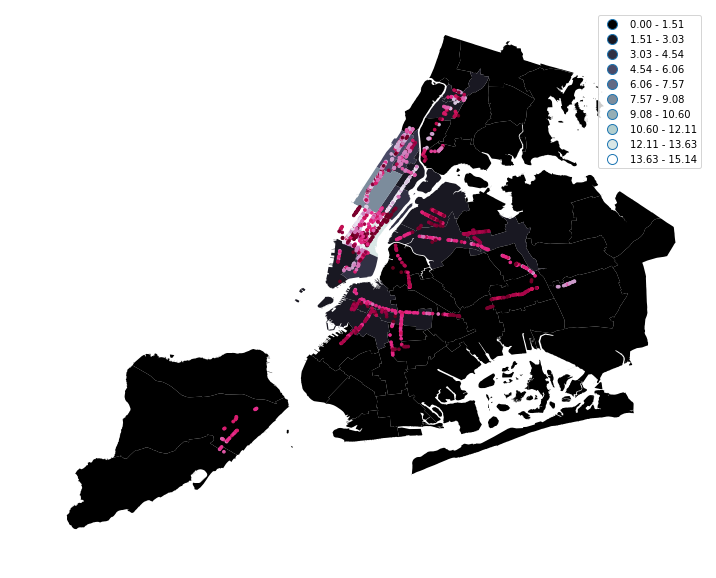

In [336]:
fig,ax=plt.subplots(figsize=(12,10))

pumashplc.plot(column='linkNYCp100p',cmap='bone',ax=ax,scheme='equal_interval',k=10,legend=True)
linkNYC.plot(column='days',ax=ax,markersize=7,cmap='PuRd_r')
ax.axis('off')

## Figure4 : The figure above is the linkNYC locations on top of a choropleth of number of stations per 100 people in 10 equal intervals. Manhattan contains more number of stations per 100people than other boroughs.

# Extra credit 1:

How would you enhance the visibility of this map? you are working with numbers that are mostly very low, and reside near each other, and them have a few much higher value points. Notice that here the high values are interesting though and should not be thrown away!

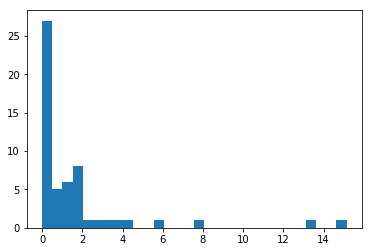

In [337]:
plt.hist(pumashplc["linkNYCp100p"], bins=30);

(-74.283370477424782,
 -73.672229948940071,
 40.47514452607718,
 40.936503646096469)

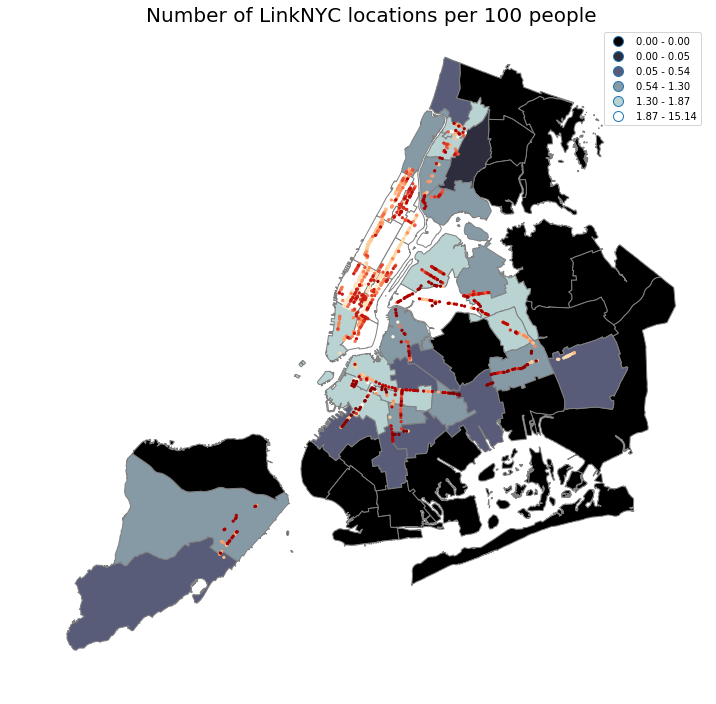

In [338]:
fig, ax = plt.subplots(1, figsize=(12,12))
pumashplc.plot(column="linkNYCp100p", ax=ax, cmap='bone',
                 scheme='quantiles',k=6, edgecolor='grey',legend=True);
linkNYC.plot(cmap='OrRd', ax=ax, markersize=5);
plt.title('Number of LinkNYC locations per 100 people', fontsize=20);
ax.axis('off')

### Figure5: The figure above shows the number of linknyc locations per 100 people. 

# Extra Credit 2:

plot Spatial Lag Deciles that describe the impact of linkNYC in providing access where needed. You can follow what you did in the lab, but you need to create a metric based on the data you have tha measures the impact of linkNYC

In [326]:
pumashplc.head(2)

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME_x,state_x,public use microdata area_x,Unnamed: 4_x,B28002_001E,pcBB,link_site,B00001_001E,NAME,state,public use microdata area_y,Unnamed: 4,linkNYCp100p
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,0.0,42158,84.275820,1.0,1517,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,0.0,0.06592
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,0.0,49817,68.310015,0.0,1959,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,0.0,0.00000


In [328]:
a = pd.cut(pumashplc['pcBB'],bins=10,labels=False)
a.head()

0    7
1    3
2    7
3    4
4    6
Name: pcBB, dtype: int64

In [346]:
pumabbimpact = pumashplc
pumabbimpact['rank'] = 10-a

pumabbimpact['impact'] = pumabbimpact['linkNYCp100p']*pumabbimpact['rank']

In [347]:
import pysal as ps

In [348]:
pumabbimpact.to_file(os.getenv('PUIDATA')+'/linknyclag.shp')
qW = ps.queen_from_shapefile((os.getenv('PUIDATA')+'/linknyclag.shp'))

In [349]:
qW.transform='r'

In [350]:

impactlag = ps.lag_spatial(qW, pumabbimpact['impact'])
impactlagq10=ps.Quantiles(impactlag,k=5)


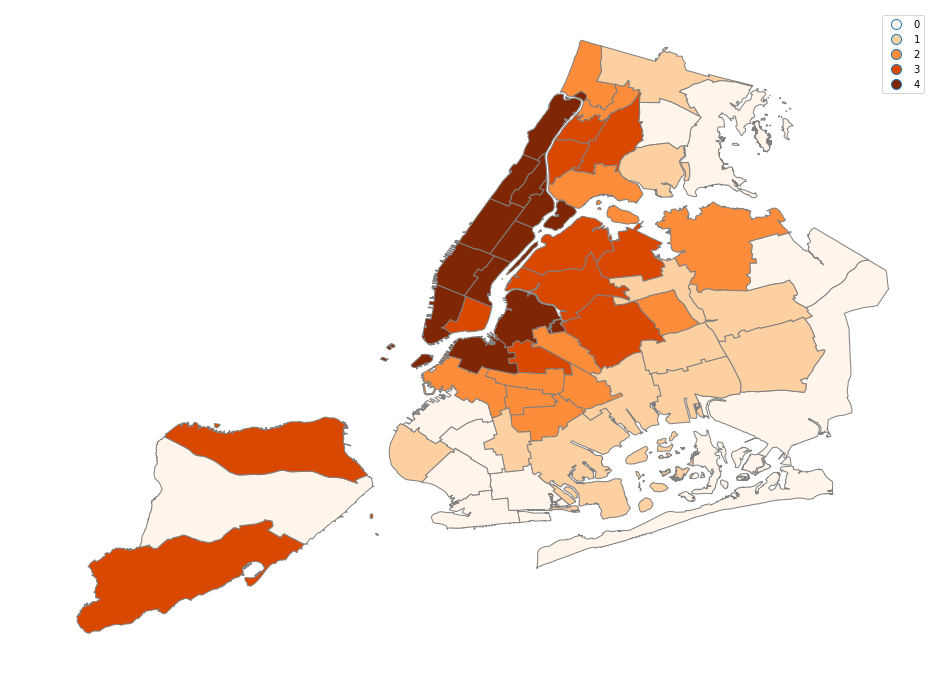

In [370]:
fig,ax = plt.subplots(figsize=(16,12))
ax.axis('off')
pumabbimpact.assign(cl=impactlagq10.yb).plot(column='cl',edgecolor='grey',ax=ax,legend=True,cmap='Oranges',categorical=True)

### Figure6: Spatial lag deciles describing the impact of linkNYC in providing access where needed.